# LAB 1
In this notebook, we use the following modules `numpy` and `minotaur_maze`. The latter is a home made module, where all the solutions to the questions are implemented. 

In [1]:
import numpy as np
import minoutaur_maze as mz
import matplotlib.pyplot as plt

# Problem 1: The Maze and the Random Minotaur

The objective of problem 1 is to solve the shortest path problem in a maze. We start first by describing the maze as a numpy array. 

In [2]:
# starting positions
thomas_st = (0,0)
minotaur_st = (6,5)

# Description of the maze as a numpy array
maze = np.array([
    [0, 0, 1, 0, 0, 0, 0, 0],
    [0, 0, 1, 0, 0, 1, 0, 0],
    [0, 0, 1, 0, 0, 1, 1, 1],
    [0, 0, 1, 0, 0, 1, 0, 0],
    [0, 0, 0, 0, 0, 0, 0, 0],
    [0, 1, 1, 1, 1, 1, 1, 0],
    [0, 0, 0, 0, 1, 2, 0, 0]
])
# with the convention 
# 0 = empty cell
# 1 = obstacle
# 2 = exit of the Maze

The method `maze.draw_maze()` helps us draw the maze given its numpy array discription.  

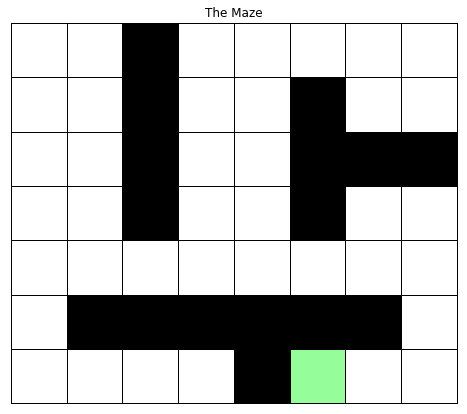

In [3]:
mz.draw_maze(maze)

## THE MINOTAUR CANNOT WAIT   

In [4]:
# Create an environment maze
minotaur_can_wait = False
env_1 = mz.MinotaurMaze(maze,minotaur_can_wait)
#env_1.show()

##  Dynamic Programming 

Before solving the MDP problem, recall that the finite horizon objective function is 
$$
    \mathbb{E} \Big[ \sum_{t=0}^T r(s_t, a_t) \Big],
$$
where $T$ is the horizon.
Recall the Bellman equation 
\begin{equation}
\forall s \in \mathcal{S} \qquad  V(s) = \max_{a \in \mathcal{A}} \Big\lbrace r(s,a) + \sum_{s' \in \mathcal{S}} \mathbb{P}(s'\vert s,a) V(s') \Big\rbrace
\end{equation}
The dynamic programming solution for the finite horizon MDP problem consists of solving the above backward recursion. The method `maze.dynamic_programming` achieves this. 
> **Note:** To find the optimal path, it is enough to set the time horizon $T = 10$. Indeed, looking at the maze one can see that the player needs at least 10 steps to attain the exit $B$, if her starting position is at $A$. In fact if you set the time horizon less than 10, you will see that you do not find the optimal path.



In [5]:
# Finite horizon
horizon = 20
# Solve the MDP problem with dynamic programming 
V, policy = mz.dynamic_programming(env_1,horizon)

In [6]:
# Simulate the best path (reacting to random minotaur actions)
method = 'DynProg'
start  = (thomas_st + minotaur_st)
path, victory_prob = env_1.simulate(start, policy, method)

In [7]:
path

[(0, 0, 6, 5),
 (0, 0, 6, 4),
 (0, 0, 6, 3),
 (0, 0, 5, 3),
 (0, 0, 6, 3),
 (0, 0, 6, 4),
 (0, 0, 5, 4),
 (0, 1, 6, 4),
 (1, 1, 6, 3),
 (2, 1, 5, 3),
 (3, 1, 4, 3),
 (4, 1, 4, 4),
 (4, 2, 5, 4),
 (4, 3, 5, 3),
 (4, 4, 4, 3),
 (4, 5, 4, 4),
 (4, 6, 4, 3),
 (4, 7, 4, 4),
 (5, 7, 5, 4),
 (6, 7, 5, 3),
 (6, 6, 5, 2)]

In [8]:
victory_prob

1

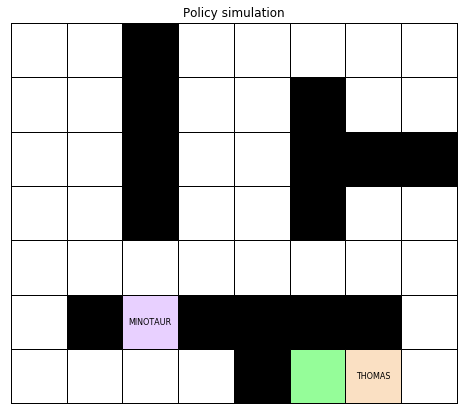

In [9]:
# Animate path 
mz.animate_solution(maze, path)

In [10]:
cell_probs = env_1.minotaur_cell_probs(maze,minotaur_st,horizon)

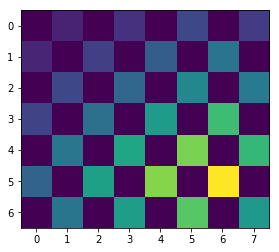

In [11]:
t = horizon
plt.imshow(cell_probs[t,:,:])

In [12]:
# Victory prob if the path is fixed
victory_prob = env_1.victory_probability(maze,path,cell_probs)
victory_prob

0

In [14]:
# Simulate several paths and compute victory prob
method = 'DynProg'
start  = (thomas_st + minotaur_st)
N = 1000
paths_dict = {}
probs_dict = {}
probs = []
for n in range(N) :
    path, victory_prob = env_1.simulate(start, policy, method)
    paths_dict[n] = path
    probs_dict[n] = victory_prob
    probs.append(victory_prob)

probs.sort()
sum(probs)/len(probs)

1.0

## THE MINOTAUR CAN WAIT

In [5]:
# Create an environment maze
minotaur_can_wait = True
env_2 = mz.MinotaurMaze(maze,minotaur_can_wait)
#env_2.show()

##  Dynamic Programming 

Before solving the MDP problem, recall that the finite horizon objective function is 
$$
    \mathbb{E} \Big[ \sum_{t=0}^T r(s_t, a_t) \Big],
$$
where $T$ is the horizon.
Recall the Bellman equation 
\begin{equation}
\forall s \in \mathcal{S} \qquad  V(s) = \max_{a \in \mathcal{A}} \Big\lbrace r(s,a) + \sum_{s' \in \mathcal{S}} \mathbb{P}(s'\vert s,a) V(s') \Big\rbrace
\end{equation}
The dynamic programming solution for the finite horizon MDP problem consists of solving the above backward recursion. The method `maze.dynamic_programming` achieves this. 
> **Note:** To find the optimal path, it is enough to set the time horizon $T = 10$. Indeed, looking at the maze one can see that the player needs at least 10 steps to attain the exit $B$, if her starting position is at $A$. In fact if you set the time horizon less than 10, you will see that you do not find the optimal path.


In [6]:
# Finite horizon
horizon = 20
# Solve the MDP problem with dynamic programming 
V, policy = mz.dynamic_programming(env_2,horizon)

In [7]:
# Simulate the best path (reacting to random minotaur actions)
method = 'DynProg'
start  = (thomas_st + minotaur_st)
path, victory_prob = env_2.simulate(start, policy, method)

In [8]:
path

[(0, 0, 6, 5),
 (0, 1, 6, 4),
 (1, 1, 6, 4),
 (2, 1, 6, 3),
 (3, 1, 5, 3),
 (4, 1, 4, 3),
 (4, 1, 4, 4),
 (4, 2, 5, 4),
 (4, 3, 4, 4),
 (3, 3, 4, 5),
 (3, 4, 5, 5),
 (4, 4, 5, 6),
 (4, 5, 5, 6),
 (4, 5, 5, 6),
 (4, 5, 6, 6),
 (4, 6, 5, 6),
 (4, 7, 4, 6),
 (5, 7, 4, 6),
 (6, 7, 4, 5),
 (6, 6, 4, 6),
 (6, 6, 4, 7),
 (6, 5, 4, 7)]

In [9]:
victory_prob

1

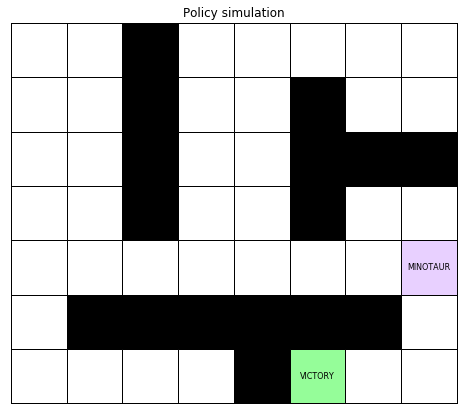

In [10]:
# Animate the path
mz.animate_solution(maze, path)

In [11]:
# Cell probabilities
cell_probs = env_2.minotaur_cell_probs(maze,minotaur_st,horizon)

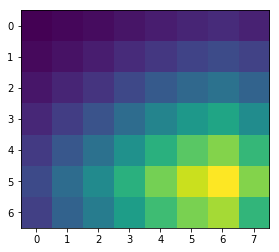

In [12]:
t = horizon
plt.imshow(cell_probs[t,:,:])

In [13]:
# Victory prob if the path is fixed
victory_prob = env_2.victory_probability(maze,path,cell_probs)
victory_prob

0.6251504597287102

In [14]:
# Simulate several paths and compute victory prob
method = 'DynProg'
start  = (thomas_st + minotaur_st)
N = 20
paths_dict = {}
probs_dict = {}
probs = []
for n in range(N) :
    path, victory_prob = env_2.simulate(start, policy, method)
    paths_dict[n] = path
    probs_dict[n] = victory_prob
    probs.append(victory_prob)

probs.sort()
sum(probs)/len(probs)

1419 14
1419 15
1419 16
1419 17
1419 18
1419 19
1419 20
1261 16
1261 17
1261 18
1261 19
1261 20


1.0

In [17]:
env_2.states[1419]

(3, 3, 4, 3)

In [19]:
env_2.acts_thomas[3,3]

[0, 2, 3, 4]

In [15]:
policy[1419,14]


1.0

In [29]:
probs

[1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1]

In [30]:
env_2.acts_thomas[5,7]

[0, 3, 4]